# Import Libraries

In [12]:
import numpy as np
import pandas as pd
import spacy
import re

import seaborn as sns
import matplotlib.pyplot as plt
import glob


# Load data

In [2]:
# Load the data into a Pandas DataFrame

df = pd.read_excel('Data_Amazon_EmployeeReview.xlsx')


## Look at the dataframe

In [4]:
df.head()

,company,location,Dates,Employee Type,Job Title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,amazon,"Phoenix, AZ",2018-12-10,Current Employee,Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5,4,5,5,5,5,580,https://www.glassdoor.com/Reviews/Amazon-Revie...
1,amazon,"Sunnyvale, CA",2018-12-10,Current Employee,"Manager, Software Development &amp, Engineering",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5,5,5,5,4,5,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
2,amazon,"Seattle, WA",2016-01-10,Current Employee,Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5,4,5,5,5,5,1759,https://www.glassdoor.com/Reviews/Amazon-Revie...
3,amazon,"Seattle, WA",2016-02-20,Current Employee,Senior Engineering Manager,"Exciting Work, Abusive Culture","Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur...",Don't pretend that the recent NY Times article...,3,3,3,3,4,4,1404,https://www.glassdoor.com/Reviews/Amazon-Revie...
4,amazon,"Seattle, WA",2013-12-17,Current Employee,Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4,3,3,5,5,4,1275,https://www.glassdoor.com/Reviews/Amazon-Revie...


# Preprocess the Dataset

## Clean the data: Find and Mark Missing Values

In [6]:
# mark zero values as missing or NaN

df[[ 'company' , 'location' , 'Dates' ,'Employee Type', 'Job Title', 'summary', 
    'pros', 'cons', 'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
   'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars',
   'senior-mangemnet-stars', 'helpful-count', 'link']
] \
= df[[ 'company' , 'location' , 'Dates' ,'Employee Type', 'Job Title', 'summary', 
    'pros', 'cons', 'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
   'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars',
   'senior-mangemnet-stars', 'helpful-count', 'link']].replace(0,np.NaN)

# count the number of NaN values in each column

print (df.isnull().sum())


company                          0
location                         0
Dates                            0
Employee Type                    0
Job Title                        0
summary                          5
pros                             6
cons                             0
advice-to-mgmt                  18
overall-ratings                  0
work-balance-stars               0
culture-values-stars             0
carrer-opportunities-stars       0
comp-benefit-stars               0
senior-mangemnet-stars           0
helpful-count                 3769
link                             0
dtype: int64


## Performing the Exploratory Data Analysis (EDA)

In [7]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns

print("Shape of the dataset(rows, columns):", df.shape)

Shape of the dataset(rows, columns): (5000, 17)


In [8]:
#get the data types of all the variables / attributes in the data set

print(df.dtypes)

company                               object
location                              object
Dates                         datetime64[ns]
Employee Type                         object
Job Title                             object
summary                               object
pros                                  object
cons                                  object
advice-to-mgmt                        object
overall-ratings                        int64
work-balance-stars                    object
culture-values-stars                  object
carrer-opportunities-stars            object
comp-benefit-stars                    object
senior-mangemnet-stars                object
helpful-count                        float64
link                                  object
dtype: object


In [10]:
#return the summary statistics of the numeric variables/attributes in thedata set

df.describe()


,overall-ratings,helpful-count
count,5000.000000,1231.000000
mean,3.613800,7.206336
std,1.298687,78.137432
min,1.000000,1.000000
25%,3.000000,1.000000
50%,4.000000,1.000000
75%,5.000000,2.000000
max,5.000000,1759.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   company                     5000 non-null   object        
 1   location                    5000 non-null   object        
 2   Dates                       5000 non-null   datetime64[ns]
 3   Employee Type               5000 non-null   object        
 4   Job Title                   5000 non-null   object        
 5   summary                     4995 non-null   object        
 6   pros                        4994 non-null   object        
 7   cons                        5000 non-null   object        
 8   advice-to-mgmt              4982 non-null   object        
 9   overall-ratings             5000 non-null   int64         
 10  work-balance-stars          5000 non-null   object        
 11  culture-values-stars        5000 non-null   object      

/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Rating Count')]

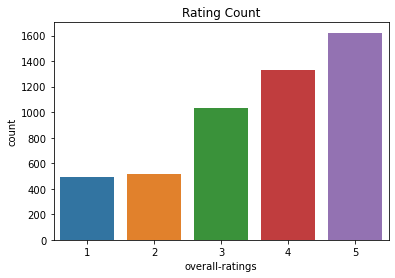

In [23]:
# Total number of reviews by rating

sns.countplot(df['overall-ratings']).set(title = 'Rating Count')


In [14]:
# Percentage of reviews by ratings

rating_count = pd.DataFrame(df['overall-ratings'].value_counts())
rating_count['percentage'] = rating_count['overall-ratings']/rating_count['overall-ratings'].sum()

rating_count

,overall-ratings,percentage
5,1622,0.3244
4,1332,0.2664
3,1033,0.2066
2,519,0.1038
1,494,0.0988


/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'work-balance-stars Count')]

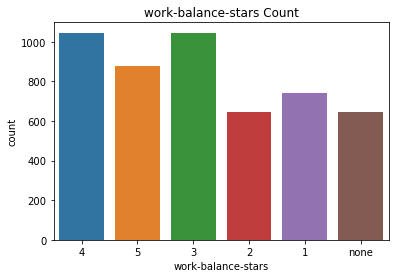

In [24]:
# Total number of work-balance-stars by rating

sns.countplot(df['work-balance-stars']).set(title = 'work-balance-stars Count')


/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'culture-values-stars Count')]

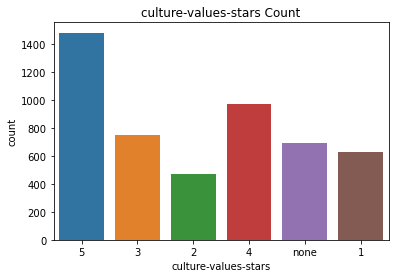

In [17]:
# Total number of work-balance-stars by rating

sns.countplot(df['culture-values-stars']).set(title = 'culture-values-stars Count')



/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'carrer-opportunities-stars Count')]

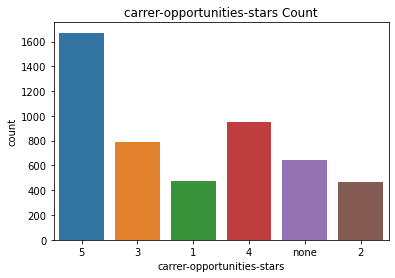

In [25]:
# Total number of carrer-opportunities-stars by rating

sns.countplot(df['carrer-opportunities-stars']).set(title = 'carrer-opportunities-stars Count')


/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'comp-benefit-stars Count')]

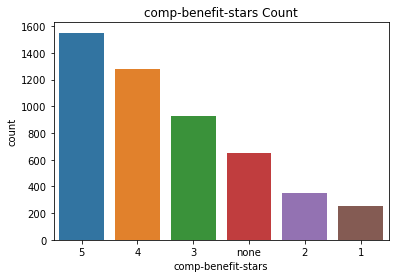

In [26]:
# Total number of comp-benefit-stars by rating

sns.countplot(df['comp-benefit-stars']).set(title = 'comp-benefit-stars Count')



/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'comp-benefit-stars Count')]

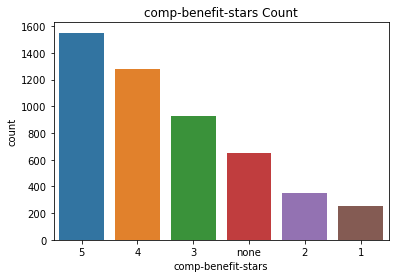

In [28]:
# Total number of comp-benefit-stars by rating

sns.countplot(df['comp-benefit-stars']).set(title = 'comp-benefit-stars Count')


/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'senior-mangemnet-stars Count')]

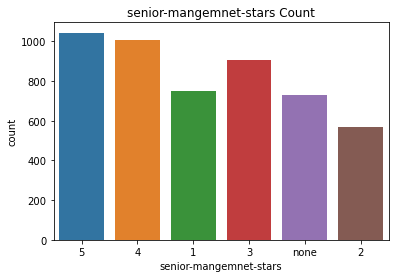

In [27]:
# Total number of senior-mangemnet-stars by rating

sns.countplot(df['senior-mangemnet-stars']).set(title = 'senior-mangemnet-stars Count')


/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count of Employee Type')]

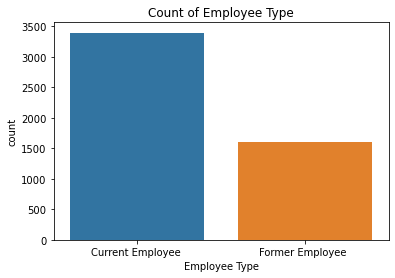

In [15]:
# count the employee types

sns.countplot(df['Employee Type']).set(title = 'Count of Employee Type')


# Create new dataset and new file for sentiment analysis

In [32]:
# create new dataset from df
review_nlp = df[['overall-ratings', 'Employee Type', 'summary', 'pros', 'cons', 'advice-to-mgmt']]
review_nlp.head()

,overall-ratings,Employee Type,summary,pros,cons,advice-to-mgmt
0,5,Current Employee,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none
1,5,Current Employee,Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none
2,5,Current Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...
3,3,Current Employee,"Exciting Work, Abusive Culture","Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur...",Don't pretend that the recent NY Times article...
4,4,Current Employee,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...


In [33]:
# Write to new file

review_nlp.to_csv('review_text.csv', index=False)
